## Pandas 사용 사례를 R에서 활용하기  
R에서 Pandas 사용 사례를 해결하려면 dplyr 라이브러리를 사용해야 합니다. 일반적인 데이터 과학 라이브러리를 가져오는 것부터 시작하겠습니다.  


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

Series는 리스트나 1차원 배열과 비슷하지만, 인덱스를 가지고 있습니다. 모든 연산은 인덱스에 맞춰 수행됩니다. R에서 행의 인덱싱을 할 때는 row.names를 사용해야 합니다.


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


시계열(series)의 일반적인 사용 사례 중 하나는 시간 시계열(time series)입니다. 시간 시계열에서는 인덱스가 특별한 구조를 가지며, 일반적으로 날짜나 시간 범위로 구성됩니다. 시간 시계열을 생성하는 가장 쉬운 방법은 ts 함수를 사용하는 것이지만, 이번에는 다른 방법으로 시간 시계열을 구현해 보겠습니다. 날짜 인덱스를 생성하기 위해서는 seq 함수를 사용하며, 이를 위해 lubridate 라이브러리가 필요합니다.

예를 들어, 매일 구매한 제품의 수량을 나타내는 시리즈가 있다고 가정해 봅시다. 그리고 매주 일요일마다 추가로 한 개의 제품을 더 가져와야 한다는 것을 알고 있습니다. 이를 시리즈를 사용하여 모델링하는 방법은 다음과 같습니다:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


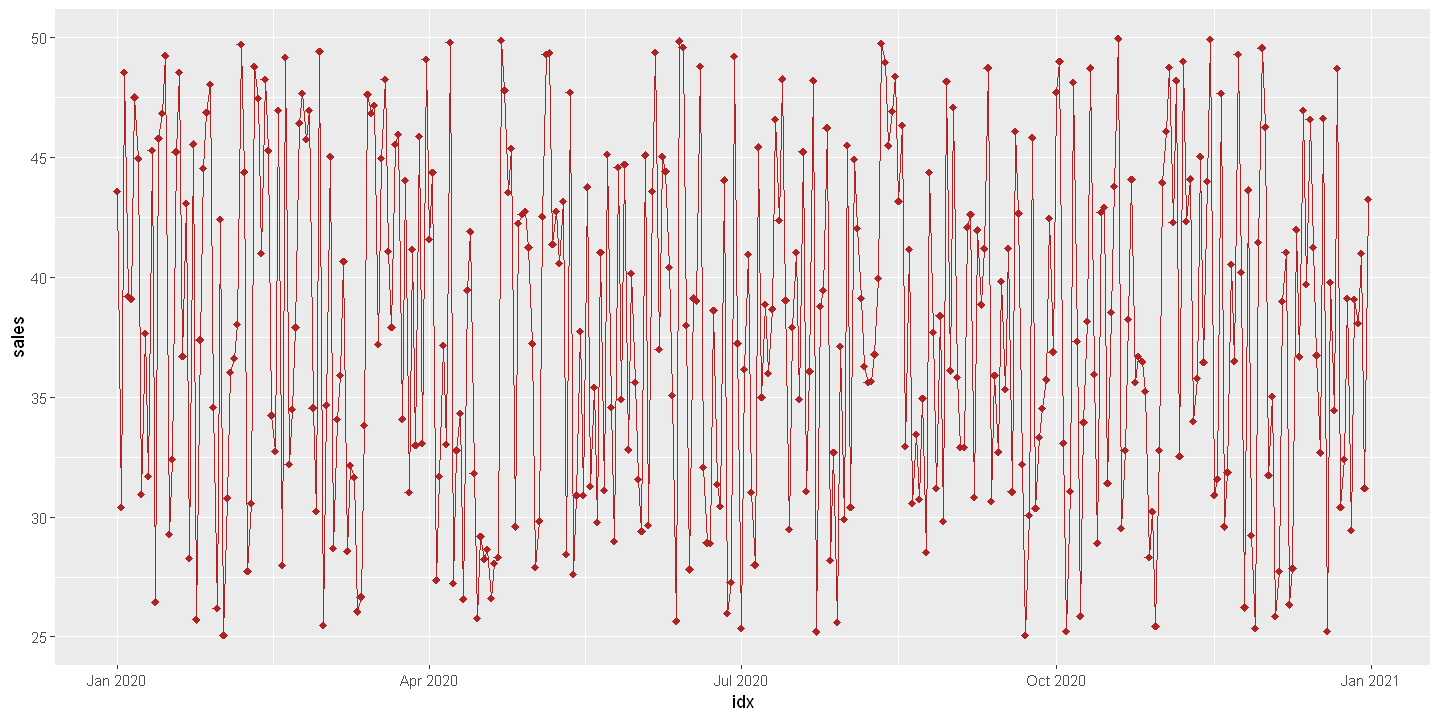

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

우리는 `additional_items`와 `sold_items`를 병합하여 총 제품 수를 찾으려고 합니다.  
보시다시피, 여기서 총합을 찾는 데 문제가 발생하고 있습니다. 주간 시리즈에서 언급되지 않은 날들은 누락된 값(NaN)으로 간주되며, NaN에 숫자를 더하면 결과가 NaN이 됩니다.  
덧셈을 수행하기 위해서는 NaN을 0으로 대체해야 합니다.  


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

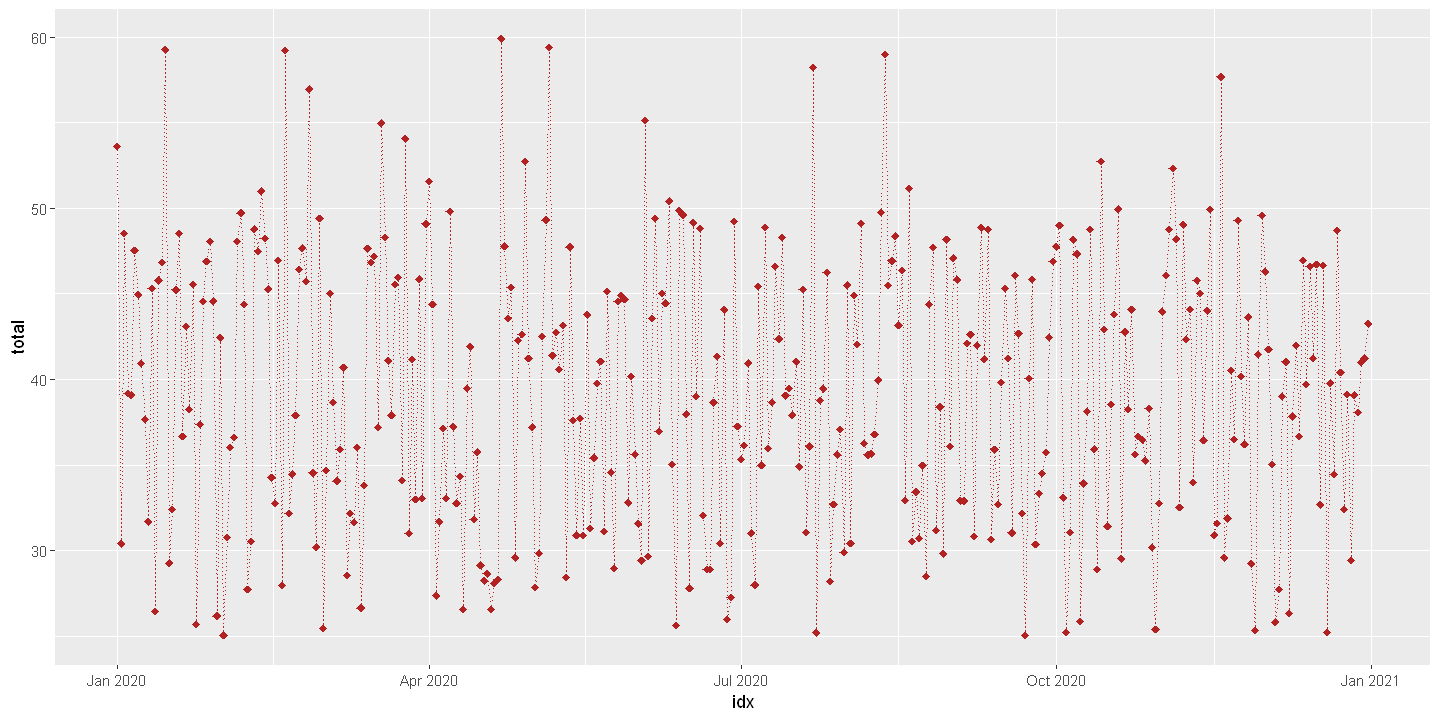

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

우리는 월별로 총 제품 수를 분석하고자 합니다. 따라서 한 달 동안의 총 제품 수의 평균을 구하고 막대 그래프를 그립니다.


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

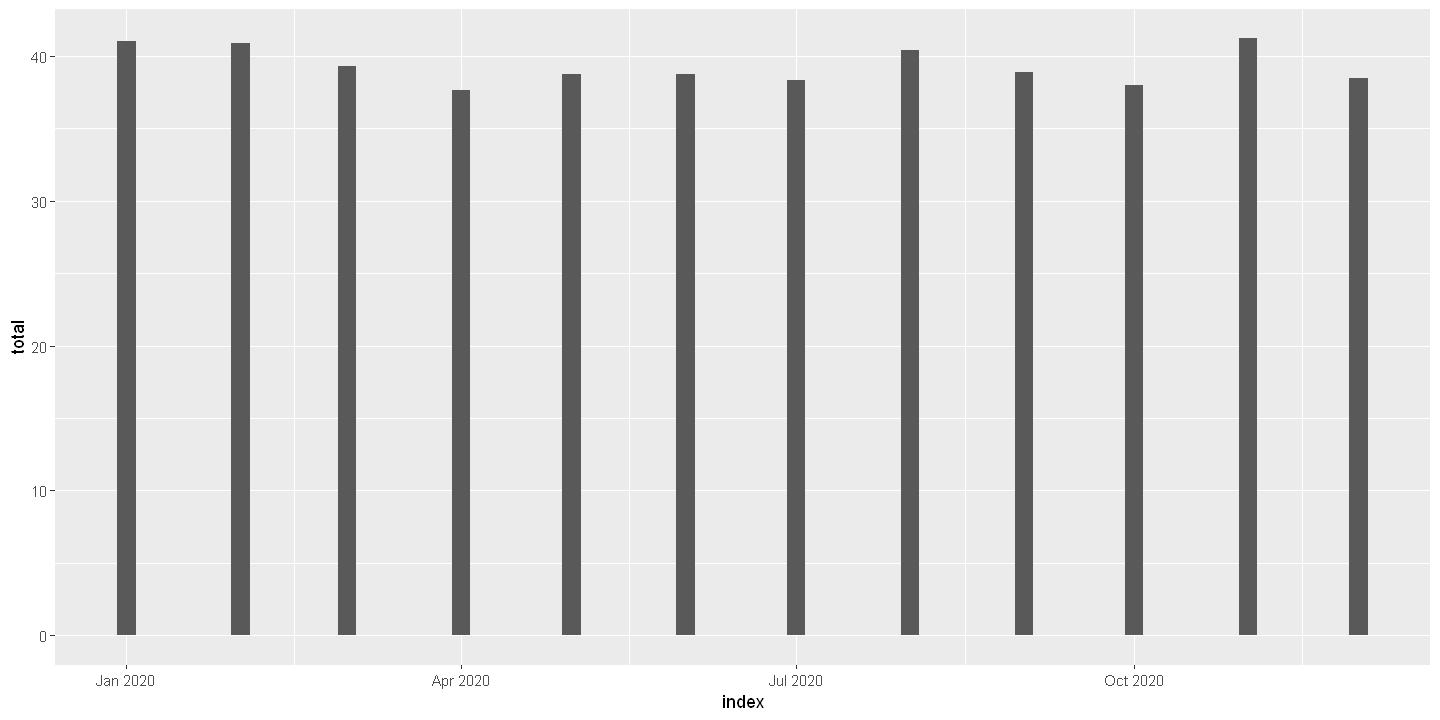

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## 데이터프레임
데이터프레임은 기본적으로 동일한 인덱스를 가진 시리즈들의 모음입니다. 여러 시리즈를 결합하여 데이터프레임을 만들 수 있습니다.  
예를 들어, a 시리즈와 b 시리즈로 데이터프레임을 만들고 있습니다.


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

우리는 rename 함수를 사용하여 열 이름을 변경할 수도 있습니다.


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

데이터프레임에서 select 함수를 사용하여 열을 선택할 수도 있습니다.


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

우리는 시리즈에서 특정 논리적 기준을 충족하는 행을 추출할 것입니다


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

새로운 열 생성하기

아래 코드는 a의 평균값으로부터의 편차를 계산하는 시리즈를 생성한 후, 기존 데이터프레임에 병합합니다.


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

우리는 A 열의 문자열 길이를 계산한 다음 기존 데이터프레임에 병합하는 시리즈를 만들고 있습니다.


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

숫자를 기준으로 행 선택


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***그룹화는 특정 조건에 따라 여러 열을 그룹화하는 것을 의미하며, 차이를 확인하기 위해 summarise 함수를 사용할 것입니다***

예를 들어, LenB의 각 숫자에 대해 열 A의 평균 값을 계산하고 싶다고 가정해봅시다. 그러면 DataFrame을 LenB로 그룹화하고 평균을 구한 뒤 이를 a라고 이름 지을 수 있습니다.


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## 출력 및 시각화
head(df)를 호출하면 데이터프레임이 표 형식으로 출력됩니다.

모든 데이터 과학 프로젝트의 첫 번째 단계는 데이터 정리와 시각화입니다. 따라서 데이터셋을 시각화하고 유용한 정보를 추출하는 것이 중요합니다.


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2는 데이터 프레임에 있는 데이터로부터 복잡한 플롯을 간단히 생성할 수 있는 매우 좋은 라이브러리입니다.

이 라이브러리는 어떤 변수를 플롯할지, 어떻게 표시할지, 그리고 전반적인 시각적 속성을 지정하는 데 있어 더 프로그래밍적인 인터페이스를 제공합니다.


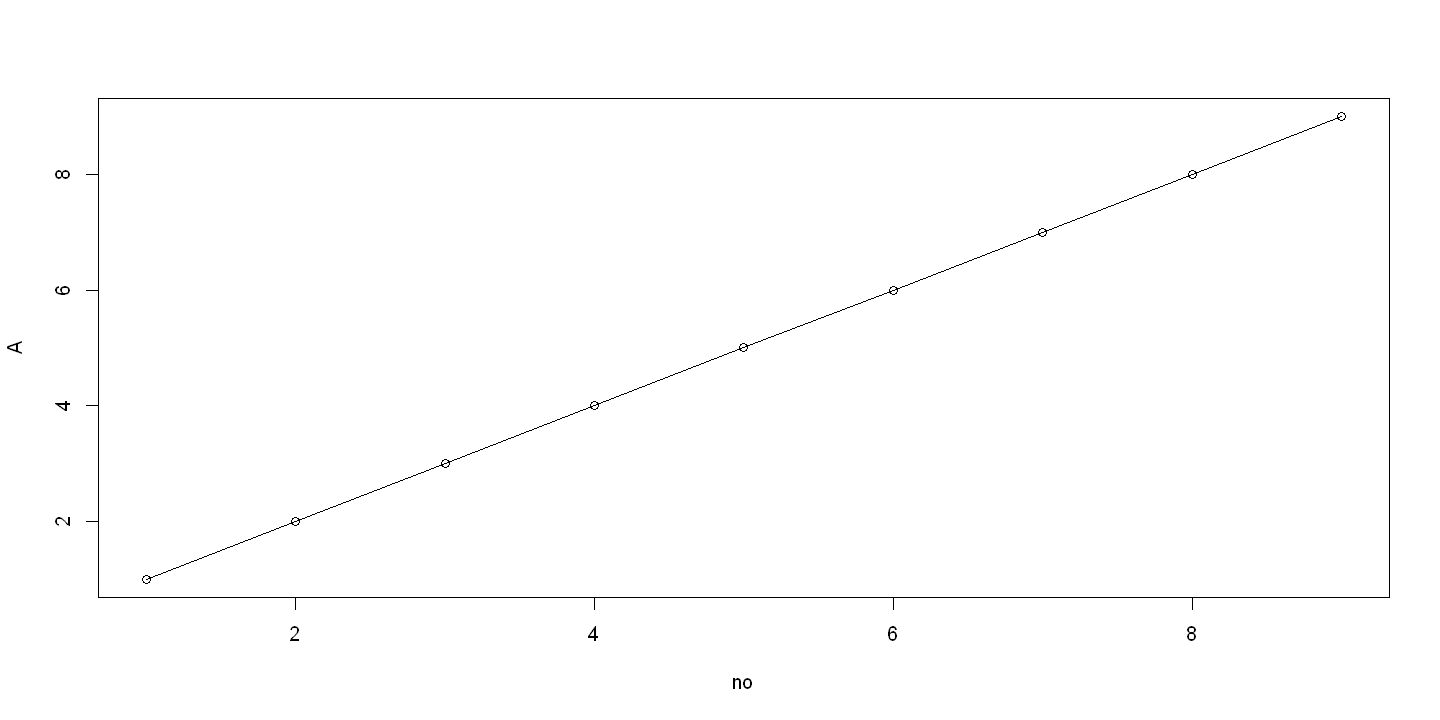

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

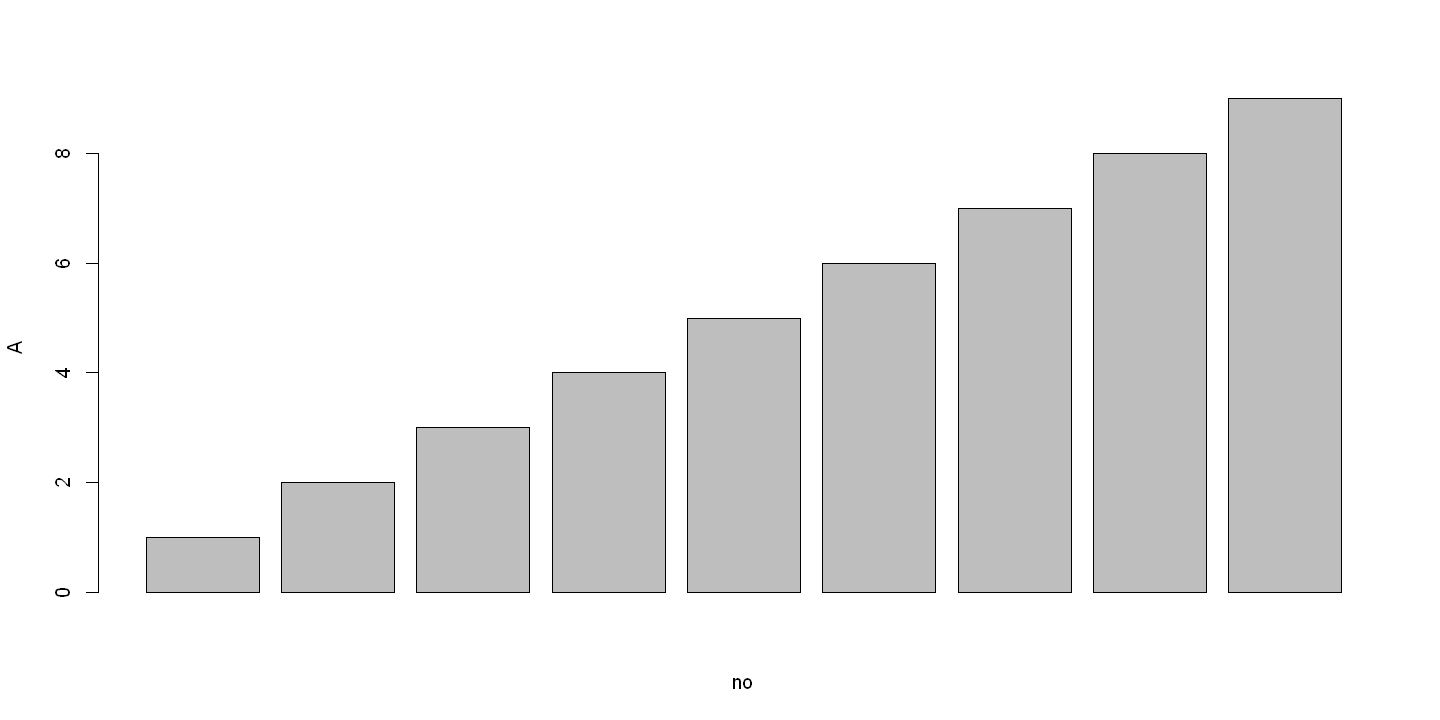

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')


---

**면책 조항**:  
이 문서는 AI 번역 서비스 [Co-op Translator](https://github.com/Azure/co-op-translator)를 사용하여 번역되었습니다. 정확성을 위해 최선을 다하고 있지만, 자동 번역에는 오류나 부정확성이 포함될 수 있습니다. 원본 문서의 원어 버전을 권위 있는 출처로 간주해야 합니다. 중요한 정보의 경우, 전문적인 인간 번역을 권장합니다. 이 번역 사용으로 인해 발생하는 오해나 잘못된 해석에 대해 책임을 지지 않습니다.
